# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
a mayor latitud menor temperatura
la temperatura tiende a subir al centro 
la humedad y las nubes no tienen nada que ver con la latitud

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Save info:
lat = []
lng = []
temp = []
cloud =[]
wind = []
humi = []
city_final = []
country = []
date=[]

#Count Cities
count=0
tot_cities = len(cities)
# Loop through the list of cities and perform a request for data on each

print(f"All Cities being processed:\n -------------------------------")

for city in cities:
    count+=1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        humi.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_final.append(city)
        print(f'Processing Record {count} of {tot_cities}| {city}')

    except:
        print(f'City not found. Skipping... {city}')
      
print("----------------------------------------")    
print("Data Retrieval Complete")
print("----------------------------------------")

All Cities being processed:
 -------------------------------
City not found. Skipping... tsienyane
Processing Record 2 of 577| bondoukou
Processing Record 3 of 577| cap malheureux
Processing Record 4 of 577| lebu
Processing Record 5 of 577| albany
Processing Record 6 of 577| tasiilaq
Processing Record 7 of 577| esperance
Processing Record 8 of 577| qaanaaq
Processing Record 9 of 577| ahipara
Processing Record 10 of 577| oshnaviyeh
Processing Record 11 of 577| katsina
Processing Record 12 of 577| hermanus
Processing Record 13 of 577| jamestown
Processing Record 14 of 577| ushuaia
Processing Record 15 of 577| castro
City not found. Skipping... illoqqortoormiut
Processing Record 17 of 577| ariquemes
Processing Record 18 of 577| koungheul
Processing Record 19 of 577| ivdel
Processing Record 20 of 577| yulara
Processing Record 21 of 577| dikson
Processing Record 22 of 577| yar-sale
Processing Record 23 of 577| margate
Processing Record 24 of 577| novikovo
Processing Record 25 of 577| kapaa


Processing Record 210 of 577| cidreira
Processing Record 211 of 577| nanortalik
Processing Record 212 of 577| wukari
Processing Record 213 of 577| mezhova
Processing Record 214 of 577| voh
Processing Record 215 of 577| owensboro
Processing Record 216 of 577| opuwo
Processing Record 217 of 577| torbay
Processing Record 218 of 577| aginskoye
Processing Record 219 of 577| hualmay
Processing Record 220 of 577| osa
Processing Record 221 of 577| bauchi
City not found. Skipping... tumannyy
Processing Record 223 of 577| felipe carrillo puerto
Processing Record 224 of 577| swan river
Processing Record 225 of 577| longyan
Processing Record 226 of 577| hoquiam
Processing Record 227 of 577| roma
Processing Record 228 of 577| bossier city
Processing Record 229 of 577| belz
Processing Record 230 of 577| kulhudhuffushi
Processing Record 231 of 577| oranjemund
Processing Record 232 of 577| sainte-julienne
Processing Record 233 of 577| qaqortoq
City not found. Skipping... saleaula
Processing Record 235

Processing Record 422 of 577| hasaki
Processing Record 423 of 577| semnan
Processing Record 424 of 577| knysna
Processing Record 425 of 577| general roca
City not found. Skipping... yuzhno-yeniseyskiy
Processing Record 427 of 577| chuguyevka
Processing Record 428 of 577| keetmanshoop
Processing Record 429 of 577| ulladulla
Processing Record 430 of 577| tocopilla
Processing Record 431 of 577| kichera
Processing Record 432 of 577| buchanan
Processing Record 433 of 577| hoi an
Processing Record 434 of 577| oga
Processing Record 435 of 577| shulan
Processing Record 436 of 577| isangel
Processing Record 437 of 577| berlevag
Processing Record 438 of 577| wenling
Processing Record 439 of 577| abu dhabi
Processing Record 440 of 577| amealco
Processing Record 441 of 577| waddan
Processing Record 442 of 577| port lincoln
Processing Record 443 of 577| fethiye
Processing Record 444 of 577| coromoro
Processing Record 445 of 577| sandakan
Processing Record 446 of 577| izvestkovyy
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df = pd.DataFrame({"City":city_final,"Lat":lat,"Lng":lng,"Max Temperature (F)": temp,
                          "Humidity":humi,"Cloudiness":cloud,"Wind Speed":wind,
                           "Country":country,"Date":date})

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 528 non-null    object 
 1   Lat                  528 non-null    float64
 2   Lng                  528 non-null    float64
 3   Max Temperature (F)  528 non-null    float64
 4   Humidity             528 non-null    int64  
 5   Cloudiness           528 non-null    int64  
 6   Wind Speed           528 non-null    float64
 7   Country              528 non-null    object 
 8   Date                 528 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 37.2+ KB


In [11]:
weather_df.head()

,City,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,bondoukou,8.03,-2.80,88.59,55,50,2.73,CI,1591633160
1,cap malheureux,-19.98,57.61,70.00,68,0,5.99,MU,1591633161
2,lebu,-37.62,-73.65,53.71,83,94,5.26,CL,1591633161
3,albany,42.60,-73.97,73.99,35,49,10.02,US,1591632884
4,tasiilaq,65.61,-37.64,41.00,85,75,24.16,GL,1591633161


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_df.describe()

,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Date
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02
mean,20.882633,20.792519,68.960530,65.850379,50.231061,8.317652,1.591633e+09
std,33.442464,89.295811,16.220168,20.930226,37.133632,5.368882,7.450201e+01
min,-54.800000,-179.170000,28.400000,6.000000,0.000000,0.380000,1.591633e+09
25%,-6.760000,-56.007500,57.000000,53.000000,9.750000,4.407500,1.591633e+09
50%,23.720000,21.700000,70.780000,69.000000,51.500000,6.930000,1.591633e+09
75%,49.275000,102.255000,80.330000,82.000000,87.250000,11.337500,1.591633e+09
max,78.220000,178.420000,112.170000,100.000000,100.000000,31.090000,1.591633e+09


In [14]:
#  Get the indices of cities that have humidity over 100%.
humidity_100 = weather_df[weather_df["Humidity"]>100].index

humidity_100

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv('City_Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [28]:
def weather_graph (x,y,label,grid=False,reg=False,title='notitle'):
    day = date.today()
    plt.scatter(x,y,marker='o',edgecolors="black")
    plt.grid(grid)
    plt.xlabel('Latitude')
    plt.ylabel(label)
    
    if title != "notitle":
        title_plot = f"City Latitude vs. {title} {day}"
        plt.title(title_plot)

    plt.show()

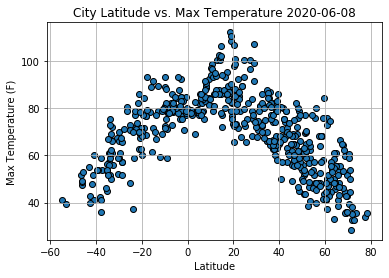

In [29]:
weather_graph(weather_df['Lat'],weather_df['Max Temperature (F)'],
              'Max Temperature (F)',True,False,"Max Temperature")

## Latitude vs. Humidity Plot

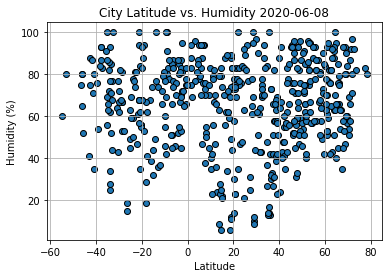

In [24]:
weather_graph(weather_df['Lat'],weather_df['Humidity'],'Humidity (%)',True,False,"Humidity")


## Latitude vs. Cloudiness Plot

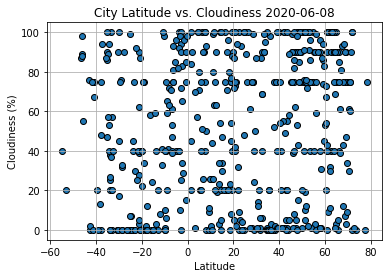

In [25]:
weather_graph(weather_df['Lat'],weather_df['Cloudiness'],'Cloudiness (%)',True,False,"Cloudiness")


## Latitude vs. Wind Speed Plot

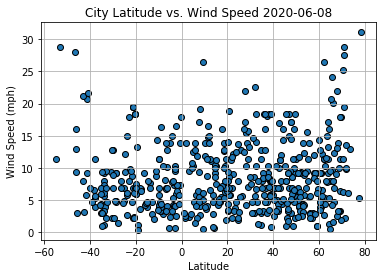

In [26]:
weather_graph(weather_df['Lat'],weather_df['Wind Speed'],'Wind Speed (mph)',True,False,"Wind Speed")


## Linear Regression

In [66]:
# OPTIONAL: Create a function to create Linear Regression plots
def weather_graph_reg (x,y,label,grid=False,reg=False):
    x_regr = x.min()+5
    y_regr = y.min()+5
    plt.scatter(x,y,marker='o')
    plt.grid(grid)
    plt.xlabel('Latitude')
    plt.ylabel(label)
    if reg==True:
        (slope, intercept,rvalue,pvalue,stderr)= linregress(x,y)
        regress_values = x*slope + intercept
        line_eq = "y = "+str(round(slope,2)) +"x + " + str(round(intercept,2))
        plt.annotate(line_eq,(x_regr,y_regr),fontsize=15,color="red")
        plt.plot(x,regress_values,"r-")
        print(f"The R-square = {round(rvalue**2,2)}")

In [56]:
# Create Northern and Southern Hemisphere DataFrames
north_df=weather_df[weather_df['Lat']>=0]
south_df = weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-square = 0.65


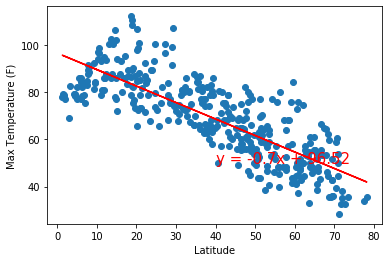

In [61]:
weather_graph_reg(north_df['Lat'],north_df['Max Temperature (F)'],'Max Temperature (F)',reg=True)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-square = 0.64


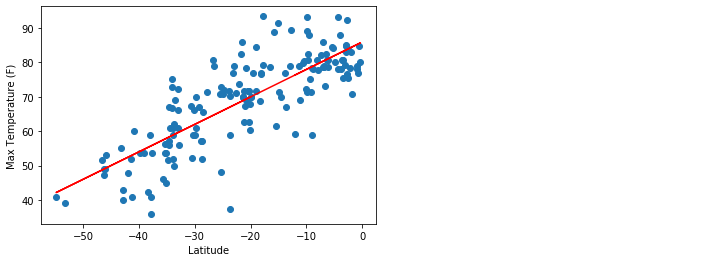

In [65]:
weather_graph_reg(south_df['Lat'],south_df['Max Temperature (F)'],'Max Temperature (F)',reg=True)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-square = 0.02


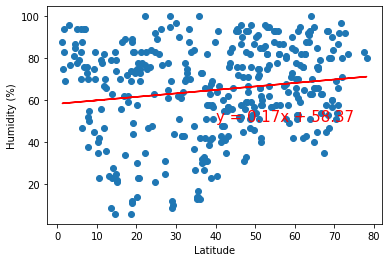

In [63]:
weather_graph_reg(north_df['Lat'],north_df['Humidity'],'Humidity (%)',reg=True)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-square = 0.01


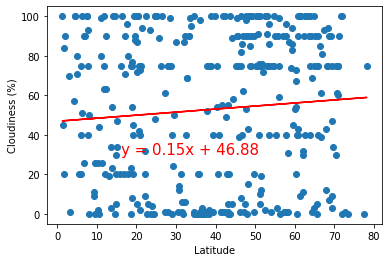

In [48]:
weather_graph_reg(north_df['Lat'],north_df['Cloudiness'],'Cloudiness (%)',reg=True)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-square = 0.01


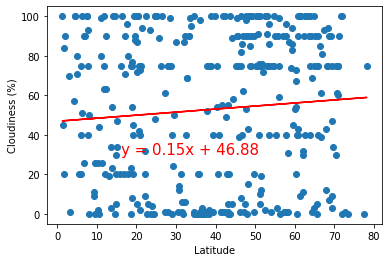

In [51]:
weather_graph_reg(north_df['Lat'],north_df['Cloudiness'],'Cloudiness (%)',reg=True)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-square = 0.01


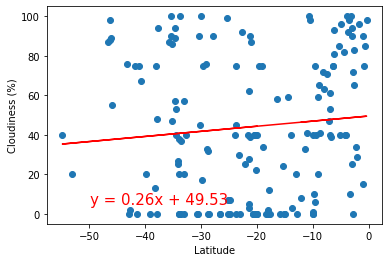

In [67]:
weather_graph_reg(south_df['Lat'],south_df['Cloudiness'],'Cloudiness (%)',reg=True)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-square = 0.01


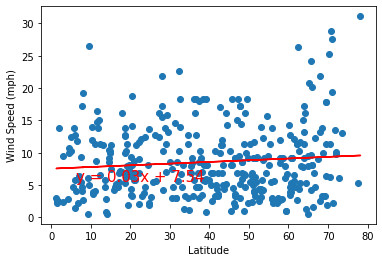

In [68]:
weather_graph_reg(north_df['Lat'],north_df['Wind Speed'],'Wind Speed (mph)',reg=True)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-square = 0.02


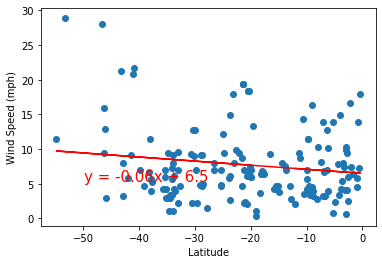

In [69]:
weather_graph_reg(south_df['Lat'],south_df['Wind Speed'],'Wind Speed (mph)',reg=True)
